### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
print("matrix \n", m)
print ("average along the rows ", np.mean(m, axis=0) )
#print (m.mean(0))
print ("average along the columns ", np.mean (m, axis=1) )
print ("overall average", np.mean(m) )



matrix 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
average along the rows  [4. 5. 6. 7.]
average along the columns  [1.5 5.5 9.5]
overall average 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

c = np.outer(u, v)
print(c)

outer = np.array([i*j for i in u for j in v ] )
print (outer.reshape(4,4))

outer_broadcasting = u.reshape(4,1) * v
print (outer_broadcasting)


[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
uniform=np.random.random_sample((10, 6))
print(uniform)
uniform[np.any(uniform<0.1, axis=1)]=0   
print(uniform)

[[0.45489699 0.07164212 0.31520175 0.36734775 0.16657004 0.24539197]
 [0.3531779  0.16079171 0.06354002 0.6233258  0.59675917 0.92158076]
 [0.86629913 0.57933137 0.65339481 0.13737349 0.22237846 0.12831154]
 [0.57021203 0.45740964 0.33181389 0.08217086 0.98953445 0.76674618]
 [0.04098894 0.38217983 0.58010036 0.86340963 0.80798811 0.59874705]
 [0.34160013 0.18886412 0.91883879 0.01740223 0.17616173 0.0104968 ]
 [0.30949721 0.42865119 0.34479127 0.22352506 0.83242237 0.24839555]
 [0.35939138 0.23368742 0.31017533 0.80363984 0.8012207  0.08110313]
 [0.49597029 0.21894424 0.11007629 0.52092733 0.87447806 0.05560537]
 [0.40752814 0.31453575 0.18083247 0.64150344 0.59378526 0.88529053]]
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.86629913 0.57933137 0.65339481 0.13737349 0.22237846 0.12831154]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.       

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

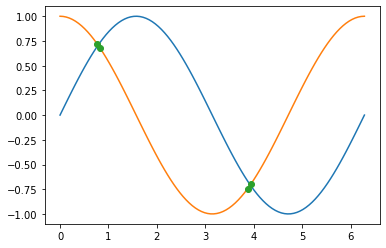

In [4]:
import numpy as np
import math as m
import matplotlib.pyplot as plt


n = np.linspace(0, 2*m.pi, num=100)
#print (n)

tenth = n[::10]
#print (tenth)

reverse = n[::-1]
#print(reverse)

mask = np.abs(np.sin(n)-np.cos(n))<0.1
m=n[mask]
#print(type(m))
#print(m)


plt.plot(n, np.sin(n))
plt.plot(n, np.cos(n))
plt.plot(m, np.cos(m), "o")

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
table = np.array([[i*j for i in range(1, 11)] for j in range(1, 11)])
print ("matrix \n",table)


trace = np.trace(table)
print ("trace \n", trace)

print("antidiagonal \n", np.diag(np.fliplr(table)))
print("diagonal offset by 1 upwards \n", np.diag(table, 1))


matrix 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
trace 
 385
antidiagonal 
 [10 18 24 28 30 30 28 24 18 10]
diagonal offset by 1 upwards 
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
dict = {'Chicago': 0, 
        'Springfield': 198, 
        'Saint-Louis': 303,
        'Tulsa':736, 
        'Oklahoma City':871, 
        'Amarillo':1175, 
        'Santa Fe':1475, 
        'Albuquerque':1544, 
        'Flagstaff':1913, 
        'Los Angeles':2448 }

cities = np.array([key for key,value in dict.items()])
km = np.array([value for key,value in dict.items()])
n = len(km)
grid = np.abs (km.reshape(n,1) - km)


def return_distance (grid, city1, city2):
    dist = grid[int(city1)][int(city2)]
    print ("the distance between the two selected cities is ", dist )

print (
        "indexes of cities \n Chicago: 0 \n Springfield: 1 \n Saint-Luis:2 "
       " \n Tulsa: 3 \n Oklahoma City: 4 \n Amarillo: 5 \n Santa Fe: 6 \n "
       "Albuquerque: 7 \n Flagstaff: 8 \n Los Angeles: 9"
       
      )
city1 = input("first city index ")
city2 = input("second city index ")

return_distance( grid,city1, city2 ) 

indexes of cities 
 Chicago: 0 
 Springfield: 1 
 Saint-Luis:2  
 Tulsa: 3 
 Oklahoma City: 4 
 Amarillo: 5 
 Santa Fe: 6 
 Albuquerque: 7 
 Flagstaff: 8 
 Los Angeles: 9
first city index 1
second city index 2
the distance between the two selected cities is  105


## 7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
import math as m
N=99
a = np.arange(N)

def is_prime( n ):
    count = 0
    for i in range (2, int(n/2)+1):
        if n % i == 0:
            count += 1
    if count == 0 and n != 0 and n!= 1:
        return True
    else:
        return False
    
mask = [is_prime(i) for i in a]
a_prime = a[mask]
print(a_prime)

for i in range(1, 4):
    N=m.pow(10, i)
    a = np.arange( N )
    mask = [is_prime(i) for i in a]
   
    a_prime = a[mask]
    #print(a_prime) 
    %timeit [is_prime(i) for i in a]
    
    

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
36 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.09 ms ± 89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
196 ms ± 6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
n = int (input("check prime number till: "))
      
prime = [True for i in range(n + 1)] 
p = 2
while (p * p <= n): 
          
       
    if (prime[p] == True): 
              
             
        for i in range(p * 2, n + 1, p): 
            prime[i] = False
    p += 1
prime[0]= False
prime[1]= False
    
for p in range(n + 1): 
    if prime[p]: 
        print (p)

check prime number till: 100
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

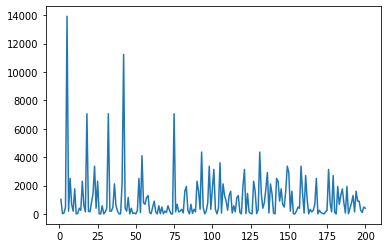

In [9]:
walkers = np.random.randint(-1, 1, (1000, 200) )
walkers[walkers == 0] =1
#print(walkers)
distance = np.sum(walkers, axis=1)
sq_dist = distance**2
sq_dist_step = (np.sum(walkers, axis=0))**2
step = np.array([i for i in range(1, 201)])
plt.plot(step, sq_dist_step)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [10]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt -P /home/giulia/Scrivania/LaboratoryOfComputationalPhysics_Y3/data/
! cat /home/giulia/Scrivania/LaboratoryOfComputationalPhysics_Y3/data/populations.txt


--2020-11-02 23:26:49--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2020-11-02 23:26:50--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc822b0d5c6580369b68f653c6a1.dl.dropboxusercontent.com/cd/0/inline/BCcD6sdcU7SCT781UBrikjSxFXZWOhkg3XrqtaKaINpVsABotJBH_JDF5SpSFEg5QvtTWwqFKxCpblBowMOi_9KRak4y6A-fukBsAnlvF2cLZw/file# [segue]
--2020-11-02 23:26:50--  https://uc822b0d5c6580369b68f653c6a1.dl.dropboxusercontent.com/cd/0/inline/BCcD6sdcU7SCT781UBrikjSxFXZWOhkg3XrqtaKaINpVsABotJBH_JDF5SpSFEg5QvtTWwqFKxCpblBowMOi_9KRak4y6A-fu

year
hares - year correlation matrix 
  [[ 1.         -0.38917662]
 [-0.38917662  1.        ]]
lynxes - year correlation matrix 
  [[ 1.         -0.02544806]
 [-0.02544806  1.        ]]
carrots - year correlation matrix 
  [[ 1.         -0.13633321]
 [-0.13633321  1.        ]]
mean 1910.0
median 1910.0
std 6.0553007081949835
hares
year - hares correlation matrix 
  [[ 1.         -0.38917662]
 [-0.38917662  1.        ]]
lynxes - hares correlation matrix 
  [[1.         0.07189206]
 [0.07189206 1.        ]]
carrots - hares correlation matrix 
  [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
mean 34080.95238095238
median 25400.0
std 20897.906458089667
lynxes
year - lynxes correlation matrix 
  [[ 1.         -0.02544806]
 [-0.02544806  1.        ]]
hares - lynxes correlation matrix 
  [[1.         0.07189206]
 [0.07189206 1.        ]]
carrots - lynxes correlation matrix 
  [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
mean 20166.666666666668
median 12300.0
std 16254.591536

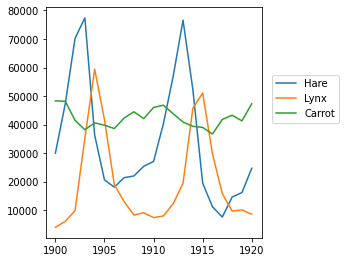

In [11]:
import os
import numpy as np
import earthpy as et



os.chdir(os.path.join(et.io.HOME, 'Scrivania'))
fname = os.path.join("LaboratoryOfComputationalPhysics_Y3", "data","populations.txt")
data = np.loadtxt(fname)

year, hares, lynxes, carrots = data.T
dict = {"year": year, 
        "hares": hares,
        "lynxes": lynxes,
         "carrots": carrots}

from matplotlib import pyplot as plt
%matplotlib inline


plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

for key,value in dict.items():
    print(key)
    for key1, value1 in dict.items():
            if key1 != key:
                print(key1, "-", key, "correlation matrix \n ", np.corrcoef(value, value1))
    
    for function in ['mean','median','std']:
        print (function, getattr(np, function)(value))
        